# Perturbed Inertial Krasnoselskii-Mann Iterations

First, we import the required files and libraries. The image is reshaped to a $512\times 512$ picture, and erase 50%.

In [1]:
# External Imports
import numpy as np
import matplotlib.pyplot as plt

# Internal Imports
from new import *

# Import the Image
image = Image(name="Image", dims=(512, 512))
image.load_image("Venice.jpeg")
mask = Mask(percentage=0.5, dims=(512, 512))
image_corrupt = mask.mask_image(image.image)

Next we create the InPainter instance, with a maximum number of iterations of $400$ and a tolerance of $10^{-4}$. We select a step size of $\rho=1.8$ and a relaxation parameter of $\lambda=1.3$, based on the experiments ran earlier, and execute the iterations. This runs in a few minutes. And as a final step, we visualize the results and plot the convergence plots.

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


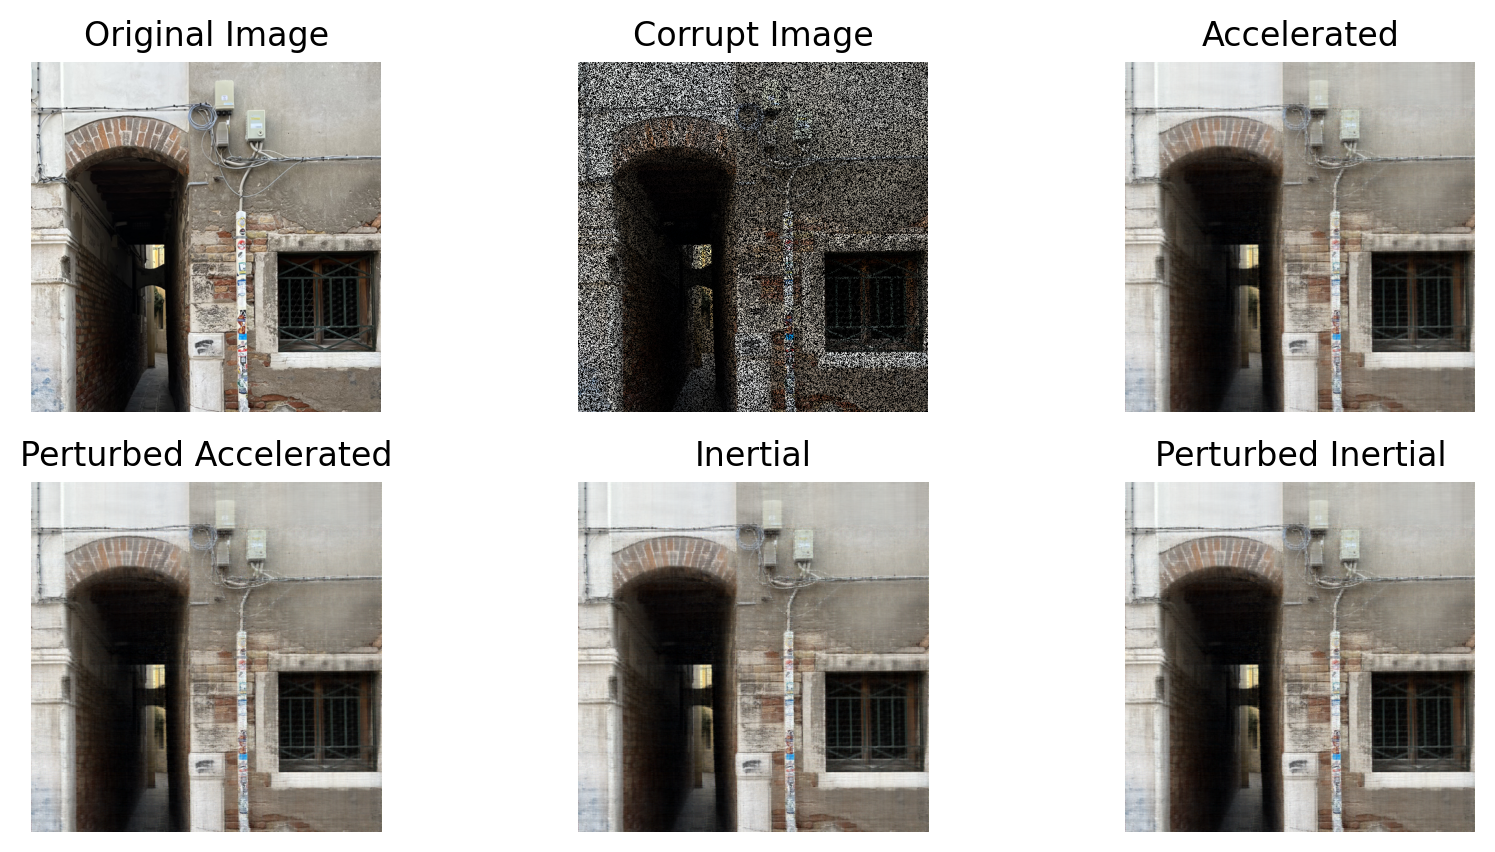

/var/folders/q1/n2qsqv_57_s719nqp2ks4stm0000gn/T/ipykernel_82609/3281949712.py:115: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([l1, l2, l3, l4],


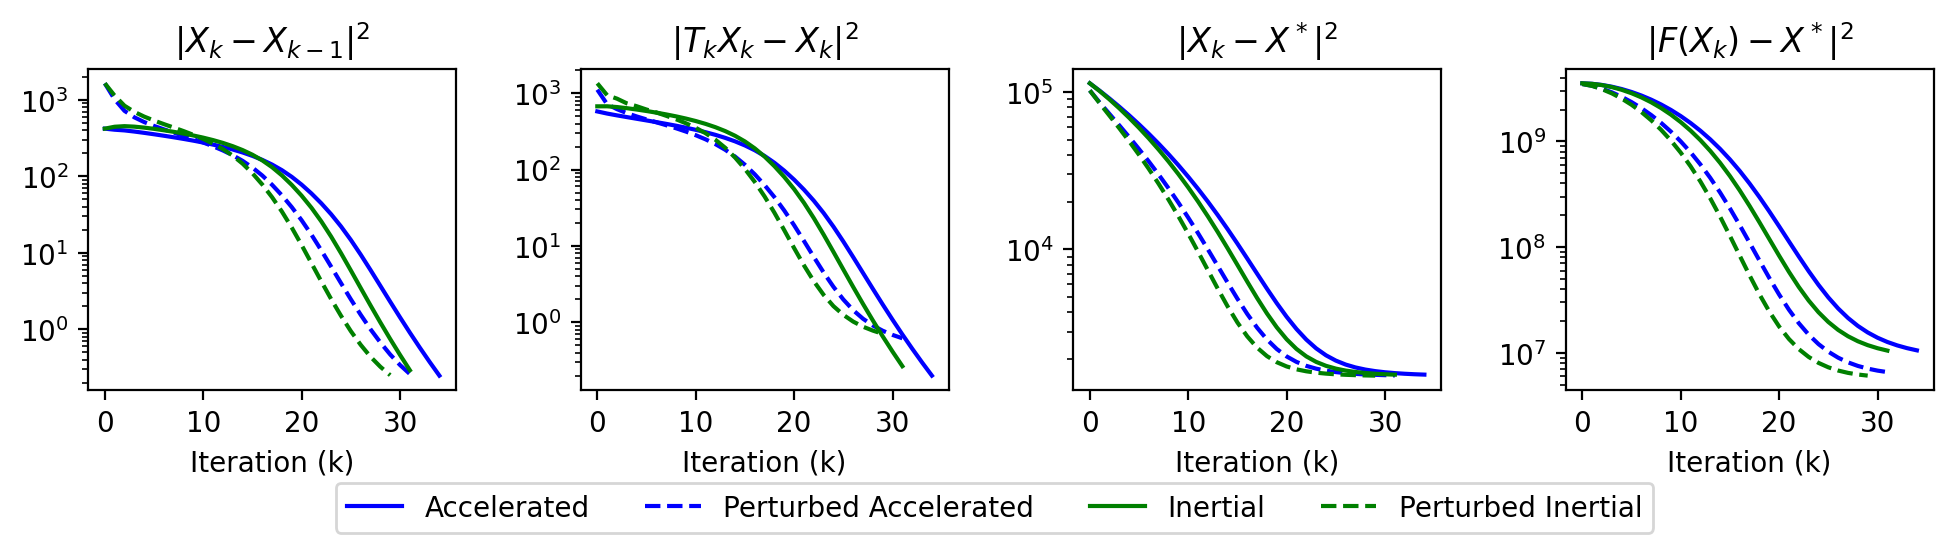

In [2]:
# Set the parameters
rho = 1.8
lamb = 0.8
sigma = 0.5
tolerance = 1e-3
max_it = 100

# Create Algorithm Instance
sol_A, hist_A, hist_T_A, hist_F_A, its_A, time_A, F_A = Algorithm(
                                    image_corrupt, mask, rho, lamb, sigma, 
                                    tolerance, max_it, method="accelerated", perturbed=False).run()
sol_PA, hist_PA, hist_T_PA, hist_F_PA, its_PA, time_PA, F_PA = Algorithm(
                                    image_corrupt, mask, rho, lamb, sigma, 
                                    tolerance, max_it, method="accelerated", perturbed=True).run()
sol_I, hist_I, hist_T_I, hist_F_I, its_I, time_I, F_I = Algorithm(
                                    image_corrupt, mask, rho, lamb, sigma, 
                                    tolerance, max_it, method="inertial", perturbed=False).run()
sol_PI, hist_PI, hist_T_PI, hist_F_PI, its_PI, time_PI, F_PI = Algorithm(
                                    image_corrupt, mask, rho, lamb, sigma, 
                                    tolerance, max_it, method="inertial", perturbed=True).run()

# Plot Original and Result
fig, axs = plt.subplots(2, 3, figsize=(10, 5), dpi=200)

axs[0,0].title.set_text("Original Image")
axs[0,0].imshow(image.image, vmin=0, vmax=1)
axs[0,0].set_axis_off()
axs[0,0].set_facecolor("white")

axs[0,1].title.set_text("Corrupt Image")
axs[0,1].imshow(image_corrupt, vmin=0, vmax=1)
axs[0,1].set_axis_off()
axs[0,1].set_facecolor("white")

axs[0,2].title.set_text("Accelerated")
axs[0,2].imshow(sol_A, vmin=0, vmax=1)
axs[0,2].set_axis_off()
axs[0,2].set_facecolor("white")

axs[1,0].title.set_text("Perturbed Accelerated")
axs[1,0].imshow(sol_PA, vmin=0, vmax=1)
axs[1,0].set_axis_off()
axs[1,0].set_facecolor("white")

axs[1,1].title.set_text("Inertial")
axs[1,1].imshow(sol_I, vmin=0, vmax=1)
axs[1,1].set_axis_off()
axs[1,1].set_facecolor("white")

axs[1,2].title.set_text("Perturbed Inertial")
axs[1,2].imshow(sol_PI, vmin=0, vmax=1)
axs[1,2].set_axis_off()
axs[1,2].set_facecolor("white")

plt.show()

# Error Plots
fig, axs = plt.subplots(1, 4, figsize=(10, 2.2), dpi=200)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.45)
plt.tight_layout()

axs[0].title.set_text("$|X_k-X_{k-1}|^2$")
l1 = axs[0].plot([np.linalg.norm(hist_A[i] - hist_A[i-1])**2 for i in range(1, len(hist_A))], 
                    "b-", label="Accelerated")
l2 = axs[0].plot([np.linalg.norm(hist_PA[i] - hist_PA[i-1])**2 for i in range(1, len(hist_PA))], 
                    "b--", label="Perturbed Accelerated")
l3 = axs[0].plot([np.linalg.norm(hist_I[i] - hist_I[i-1])**2 for i in range(1, len(hist_I))], 
                    "g-", label="Inertial")
l4 = axs[0].plot([np.linalg.norm(hist_PI[i] - hist_PI[i-1])**2 for i in range(1, len(hist_PI))], 
                    "g--", label="Perturbed Inertial")
axs[0].set_yscale('log')
axs[0].set_xlabel("Iteration (k)")

axs[1].title.set_text(r"$|T_kX_k-X_{k}|^2$")
axs[1].plot([np.linalg.norm(hist_T_A[i] - hist_A[i])**2 for i in range(1, len(hist_A))], 
              "b-", label="Accelerated")
axs[1].plot([np.linalg.norm(hist_T_PA[i] - hist_PA[i])**2 for i in range(1, len(hist_PA))], 
              "b--", label="Perturbed Accelerated")
axs[1].plot([np.linalg.norm(hist_T_I[i] - hist_I[i])**2 for i in range(1, len(hist_I))], 
              "g-", label="Inertial")
axs[1].plot([np.linalg.norm(hist_T_PI[i] - hist_PI[i])**2 for i in range(1, len(hist_PI))], 
              "g--", label="Perturbed Inertial")
axs[1].set_yscale('log')
axs[1].set_xlabel("Iteration (k)")

axs[2].title.set_text(r"$|X_k-X^*|^2$")
axs[2].plot([np.linalg.norm(hist_A[i] - image.image)**2 for i in range(1, len(hist_A))], 
              "b-", label="Accelerated")
axs[2].plot([np.linalg.norm(hist_PA[i] - image.image)**2 for i in range(1, len(hist_PA))], 
              "b--", label="Perturbed Accelerated")
axs[2].plot([np.linalg.norm(hist_I[i] - image.image)**2 for i in range(1, len(hist_I))], 
              "g-", label="Inertial")
axs[2].plot([np.linalg.norm(hist_PI[i] - image.image)**2 for i in range(1, len(hist_PI))], 
              "g--", label="Perturbed Inertial")
axs[2].set_yscale('log')
axs[2].set_xlabel("Iteration (k)")

axs[3].title.set_text(r"$|F(X_k)-X^*|^2$")
axs[3].plot([np.linalg.norm(hist_F_A[i] - F_A(image.image))**2 for i in range(1, len(hist_A))], 
              "b-", label="Accelerated")
axs[3].plot([np.linalg.norm(hist_F_PA[i] - F_PA(image.image))**2 for i in range(1, len(hist_PA))], 
              "b--", label="Perturbed Accelerated")
axs[3].plot([np.linalg.norm(hist_F_I[i] - F_I(image.image))**2 for i in range(1, len(hist_I))], 
              "g-", label="Inertial")
axs[3].plot([np.linalg.norm(hist_F_PI[i] - F_PI(image.image))**2 for i in range(1, len(hist_PI))], 
              "g--", label="Perturbed Inertial")
axs[3].set_yscale('log')
axs[3].set_xlabel("Iteration (k)")

fig.legend([l1, l2, l3, l4], 
           labels=["Accelerated", "Perturbed Accelerated", "Inertial", "Perturbed Inertial"],
            loc='lower center', 
            bbox_to_anchor=(0.5, -0.18),
            ncol=4)

plt.show()